IRIS DATASET



In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [18]:
iris = load_iris()
x=iris.data
y=iris.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

1. Hold Out Method, Test size = 25%

In [20]:
k_size = 0.25
r_seeds = 100
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = k_size, random_state=r_seeds)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (112, 4)
Shape of X_test:  (38, 4)
Shape of y_train:  (112,)
Shape of y_test:  (38,)


2. Decision Tree Classification

In [21]:
deci_tree = DecisionTreeClassifier(criterion='entropy')
deci_tree.fit(X_train, y_train)
prediction = deci_tree.predict(X_test)

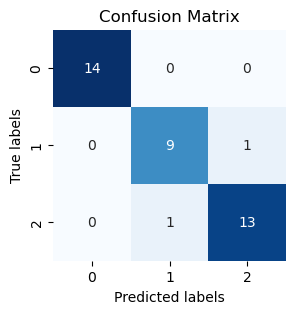

In [22]:
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

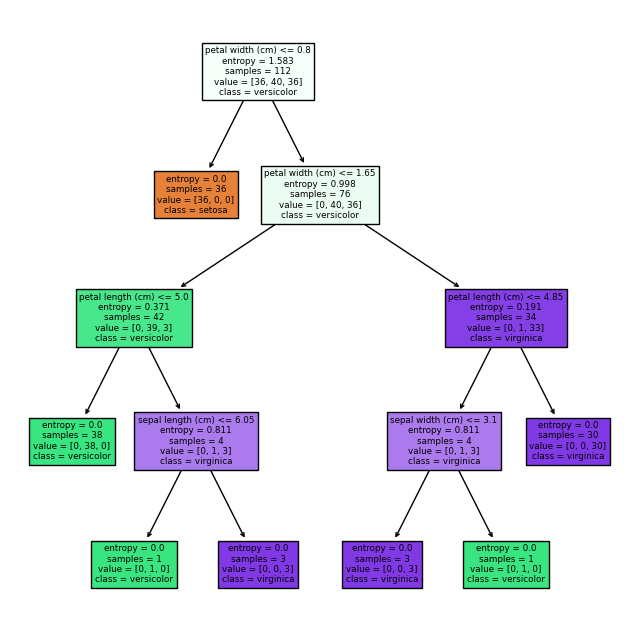

In [23]:

# Plot the decision tree
plt.figure(figsize=(8, 8))
plot_tree(deci_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

plt.show()

In [24]:
accuracy_dt = accuracy_score(y_test, prediction)
print("Accuracy on Hold Out method using classification:", accuracy_dt*100,"%")

report = classification_report(y_test, prediction)
print("Classification Report:\n", report)

Accuracy on Hold Out method using classification: 94.73684210526315 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



3. KNearest Neighbour Classification

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)


# Ignore FutureWarning from scikit-learn
warnings.filterwarnings("ignore", category=FutureWarning)

In [26]:
accuracy_knn = accuracy_score(y_test, prediction2)
print("Accuracy on Hold Out method using classification:", accuracy_knn*100,"%")

report = classification_report(y_test, prediction2)
print("Classification Report:\n", report)

Accuracy on Hold Out method using classification: 97.36842105263158 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



4. Naive Bayes

In [27]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [28]:
prediction3 = nb.predict(X_test)

In [29]:
accuracy_nb = accuracy_score(y_test, prediction3)
print("Accuracy on Hold Out method using classification:", accuracy_nb*100,"%")

report = classification_report(y_test, prediction3)
print("Classification Report:\n", report)

Accuracy on Hold Out method using classification: 94.73684210526315 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.90      0.90      0.90        10
           2       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



5. Random Subsampling, Test Size = 25%

In [30]:
iris = load_iris()
x = iris.data
y = iris.target

subsample_size = 25  
test_size = 0.25  # 25% of the data will be used for testing
indices = np.random.choice(len(x), size=subsample_size, replace=True)

x_subsample = x[indices]
y_subsample = y[indices]

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_subsample, y_subsample, test_size=test_size, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Classifier on the scaled training data
deci_tree = DecisionTreeClassifier(criterion="entropy")
deci_tree.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = deci_tree.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)

Accuracy: 0.7142857142857143
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       0.00      0.00      0.00         2
   virginica       0.50      1.00      0.67         2

    accuracy                           0.71         7
   macro avg       0.50      0.67      0.56         7
weighted avg       0.57      0.71      0.62         7



C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
